In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

### Building a dataset

Text(0, 0.5, 'Sy')

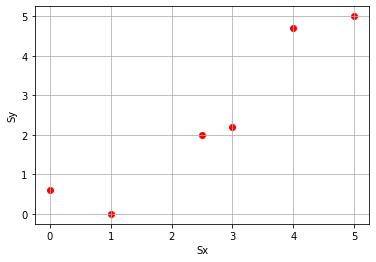

In [2]:
Sx = np.array([0, 1, 2.5, 3, 4, 5], dtype=np.float32)
Sy = np.array([0.6, 0, 2, 2.2, 4.7, 5], dtype=np.float32)

# Plotting in graph
plt.scatter(Sx, Sy, color='r')

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

#### How can we get a line that goes through all the points given in the above graph?

We can not achieve this using a single straight line. What if we can combine multiple straight lines?

Lets assume a straight line 

$$y = wx + c$$

We can build a polynomial by merging multiple straing lines using the the following equations:

$$
l_0 = \sigma (w_0x + c_0) \\
l_1 = \sigma (w_1x + c_1) \\
l_2 = w_2l_0 + w_3l_1 + c_2 \\
$$
Here,
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

Now, $l_2$ is a polynomial with multiple straight lines.

In [3]:
w0 = tf.Variable(1.2, dtype=tf.float32)
w1 = tf.Variable(2, dtype=tf.float32)
w2 = tf.Variable(-0.5, dtype=tf.float32)
w3 = tf.Variable(1.2, dtype=tf.float32)
w4 = tf.Variable(1.6, dtype=tf.float32)
w5 = tf.Variable(0.8, dtype=tf.float32)
w6 = tf.Variable(0.9, dtype=tf.float32)
w7 = tf.Variable(1, dtype=tf.float32)
w8 = tf.Variable(1.5, dtype=tf.float32)
w9 = tf.Variable(0.6, dtype=tf.float32)
w10 = tf.Variable(2, dtype=tf.float32)
w11 = tf.Variable(0.9, dtype=tf.float32)
w12 = tf.Variable(1.1, dtype=tf.float32)
w13 = tf.Variable(0.6, dtype=tf.float32)
w14 = tf.Variable(0.5, dtype=tf.float32)

c0 = tf.Variable(1.2, dtype=tf.float32)
c1 = tf.Variable(2, dtype=tf.float32)
c2 = tf.Variable(0.8, dtype=tf.float32)
c3 = tf.Variable(0.5, dtype=tf.float32)
c4 = tf.Variable(0.2, dtype=tf.float32)
c5 = tf.Variable(0.1, dtype=tf.float32)
c6 = tf.Variable(1, dtype=tf.float32)

def line_fn(x):
  l0 = tf.nn.sigmoid(w0*x + c0)
  l1 = tf.nn.sigmoid(w1*x + c1)
  l2 = tf.nn.sigmoid(w2*x + c2)

  l3 = tf.nn.sigmoid(w3*l0 + w4*l1 + w5*l2 + c3)
  l4 = tf.nn.sigmoid(w6*l0 + w7*l1 + w8*l2 + c4)
  l5 = tf.nn.sigmoid(w9*l0 + w10*l1 + w11*l2 + c5)

  l6 = w12*l3 + w13*l4 + w14*l5 + c6

  return l6

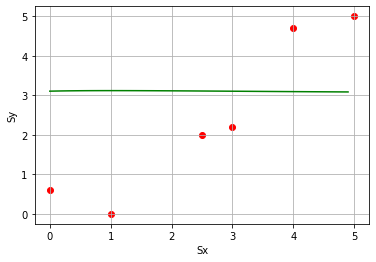

In [4]:
# A function which would plot the line
def plot_line():
    clear_output(wait=True)
    p = np.arange(0, 5, 0.1)
    plt.plot(p, line_fn(p).numpy(), color='g')

    # Plotting in graph
    plt.scatter(Sx, Sy, color='r')

    # Graph axis names and grids
    plt.grid(True)
    plt.xlabel('Sx')
    plt.ylabel('Sy')
    plt.show()

plot_line()

## Gradient descending algorithm:
$$m_{t} = m_{t-1} - lr \; \frac{\partial \;\; loss(l(x), y)}{\partial m} $$

$$loss(l(x), y) = (l(x) - y)^2$$

#### Here,

* $t$ = Time step
* $x$ = Input
* $y$ = Output
* $m$ = Updatable variable
* $loss(\cdot, \cdot)$ = Loss function
* $lr$ = Learning rate
* $l(\cdot)$ = Line function

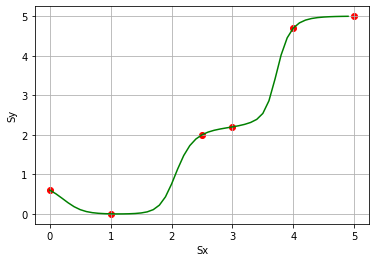

Step 49001:
Loss: 8.883171975782034e-14
Lr: 0.0057


In [5]:
# learning rate
lr = 1
total_steps = 50000

for step in range(total_steps):
    #print(f"Step {step+1:2}:")
    #print("-"*30)

    with tf.GradientTape() as tape:
        # Stating what variables need to be partially differentiated and calibrated
        tape.watch([w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, c0, c1, c2, c3, c4, c5, c6])

        # Passing the points to the line function
        pred_y = line_fn(Sx)

        # Calculating the difference/loss of the output (pred_y) of the function
        # w.r.t. the known output (Sy)
        loss = (pred_y - Sy) * (pred_y - Sy)

    # Calculating the gradients w.r.t. the partially diff. parameters
    # and the generated output loss
    grads = tape.gradient(loss, [w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, c0, c1, c2, c3, c4, c5, c6])
    
    # For some values, the gradient values can be very big, we call it 
    # exploding gradients. To tackle such problem we are clipping the values to 1
    grads = tf.clip_by_norm(grads, 1)

    # Updating the gradients
    w0 = w0 - lr * grads[0]
    w1 = w1 - lr * grads[1]
    w2 = w2 - lr * grads[2]
    w3 = w3 - lr * grads[3]
    w4 = w4 - lr * grads[4]
    w5 = w5 - lr * grads[5]
    w6 = w6 - lr * grads[6]
    w7 = w7 - lr * grads[7]
    w8 = w8 - lr * grads[8]
    w9 = w9 - lr * grads[9]
    w10 = w10 - lr * grads[10]
    w11 = w11 - lr * grads[11]
    w12 = w12 - lr * grads[12]
    w13 = w13 - lr * grads[13]
    w14 = w14 - lr * grads[14]

    c0 = c0 - lr * grads[15]
    c1 = c1 - lr * grads[16]
    c2 = c2 - lr * grads[17]
    c3 = c3 - lr * grads[18]
    c4 = c4 - lr * grads[19]
    c5 = c5 - lr * grads[20]
    c6 = c6 - lr * grads[21]
    
    if step%1000 == 0:
        plot_line()
        print(f"Step {step+1:2}:")
        print(f"Loss: {sum(loss)}")
        print(f"Lr: {lr:.4f}")
        #time.sleep(0.25)
        lr -= lr * 0.1

## Lets check the final result

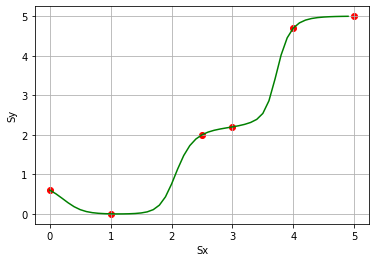

In [6]:
plot_line()